In [4]:
#Libraries and packages

import numpy as np
import pandas as pd
import numpy as pi
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import os
import pandas as pd
from plotly.subplots import make_subplots
import plotly_express as px

In [5]:
pz=pd.read_csv('C:/Users/Triumph/Desktop/RData/inter_Monthly_Piezometer.csv') #dataset
pz

,Date,PZ1,PZ106,PZ107,PZ108,PZ109,PZ110,PZ111,PZ2,PZ3,PZ4,PZ7,PZ8,Water_level,Rainfall
0,01/31/2002,217.43,213.60,218.16,218.44,220.80,220.64,221.21,210.61,213.02,217.41,228.21,228.98,232.07,0.0
1,02/28/2002,217.39,213.55,218.10,218.36,220.65,220.70,221.08,210.76,212.85,217.29,228.15,228.72,231.43,0.0
2,03/31/2002,217.34,213.53,218.01,218.26,220.46,220.72,220.91,210.70,212.79,217.18,228.08,228.54,230.69,0.0
3,04/30/2002,217.24,213.49,217.85,218.08,220.17,220.72,220.63,210.62,212.82,217.05,227.95,228.36,229.65,31.1
4,05/31/2002,217.15,213.41,217.70,217.93,219.91,220.66,220.39,210.38,212.78,216.91,227.83,228.23,228.62,39.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,08/31/2022,217.56,217.63,218.74,218.96,222.60,221.50,222.16,210.02,212.75,216.68,230.08,230.85,231.61,186.8
248,09/30/2022,217.87,214.89,219.24,219.52,223.06,221.94,222.53,214.16,215.41,216.95,231.49,232.34,235.06,169.5
249,10/31/2022,217.92,213.99,219.21,219.51,223.14,222.10,222.73,211.73,213.41,217.20,230.72,232.18,235.03,18.6
250,11/30/2022,217.79,213.77,218.98,219.25,222.91,222.17,222.65,210.39,212.75,217.58,229.63,231.03,234.70,0.0


# Linear Regression

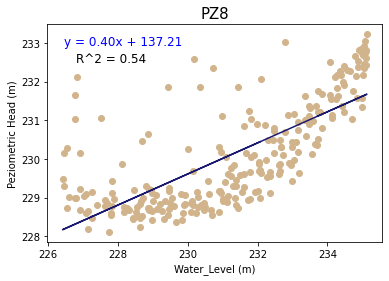

In [80]:


# Define your data points

y0=pz['PZ8'].to_numpy() # Dependent variable

x0=pz['Water_level'].to_numpy() # Independent variable
x0=x0.reshape(-1,1)

# Perform linear regression
PZ_WaterL=LinearRegression()
PZ_WaterL.fit(x0,y0)

# Get the slope (coefficient) and intercept
m = PZ_WaterL.coef_[0]   #slope
b = PZ_WaterL.intercept_  #intercept

# Add the equation on the plot
equation = f'y = {m:.2f}x + {b:.2f}'
plt.text(0.05, 0.95, equation, color='blue', transform=plt.gca().transAxes, ha='left', va='top', fontsize=12)

#the plot
y0_pred=PZ_WaterL.predict(x0)
plt.scatter(x0,y0, color= 'tan') 
plt.plot(x0,y0_pred, color='midnightblue') #regression line

plt.annotate("R^2 = {:.2f}".format(r2_score(y0,y0_pred)), (226.8, 232.5),fontsize=12) #rsquare


plt.title("PZ8", fontsize=15)
plt.xlabel('Water_Level (m)')
plt.ylabel('Peziometric Head (m)')

# Show the plot
plt.show()


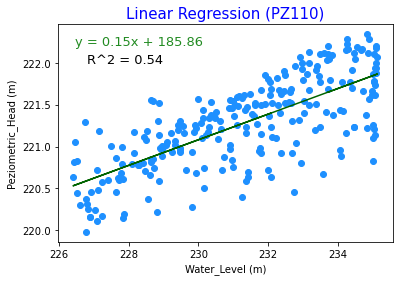

In [90]:

# Define your data points

#input=(int("enter your choice piezometeric head"))
y0=pz['PZ110'].to_numpy() # Dependent variable

x0=pz['Water_level'].to_numpy() # Independent variable
x0=x0.reshape(-1,1)

# Perform linear regression
PZ_WaterL=LinearRegression()
PZ_WaterL.fit(x0,y0)

# Get the slope (coefficient) and intercept
m = PZ_WaterL.coef_[0]   #slope
b = PZ_WaterL.intercept_  #intercept

# Add the equation on the plot
equation = f'y = {m:.2f}x + {b:.2f}'
plt.text(0.05, 0.95, equation, color='forestgreen', transform=plt.gca().transAxes, ha='left', va='top', fontsize=13)

#the plot
y0_pred=PZ_WaterL.predict(x0)
plt.scatter(x0,y0, color= 'dodgerblue') 
plt.plot(x0,y0_pred, color='darkgreen') #regression line

plt.annotate("R^2 = {:.2f}".format(r2_score(y0,y0_pred)), (226.8, 222),fontsize=13, color='black') #rsquare


plt.title("Linear Regression (PZ110)", fontsize=15, color='blue')
plt.xlabel('Water_Level (m)')
plt.ylabel('Peziometric_Head (m)')

# Show the plot
plt.show()


# Polynomial Regression

In [77]:
#define the data set
y0=pz['PZ8'].to_numpy() # Dependent variable

x0=pz['Water_level'].to_numpy() # Independent variable
x0=x0.reshape(-1,1)


# Generate polynomial features
degree = 2  # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
x_poly = poly_features.fit_transform(x0)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(x_poly, y0)

# Predict using the polynomial regression model
y_pred = model.predict(x_poly)

# Calculate R-squared
r2 = r2_score(y0, y_pred)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the polynomial equation
equation = f'y = {intercept:.2f}'
for i in range(1, degree + 1):
    equation += f' + {coefficients[i]:.2f}x^{i}'

print(f"R-squared: {r2:.4f}")
print(f"Polynomial equation: {equation}")



R-squared: 0.7113
Polynomial equation: y = 5139.70 + -42.91x^1 + 0.09x^2


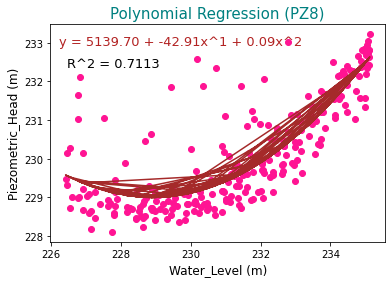

<Figure size 576x432 with 0 Axes>

In [78]:
# Plot the data and regression line
plt.scatter(x0, y0, color='deeppink')
plt.plot(x0, y_pred, color='brown')


# Set plot labels and title
plt.ylabel('Piezometric_Head (m)', fontsize=12)
plt.xlabel('Water_Level (m)', fontsize=12)
plt.title("Polynomial Regression (PZ8)", color="teal", fontsize=15)
# Set the figure size

# Add equation and R-squared as text annotation inside the plot
plt.text(0.025, 0.95, equation, ha='left', va='top', transform=plt.gca().transAxes, fontsize=13, color="firebrick")
plt.text(0.05, 0.85, f'R^2 = {r2:.4f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=13)
plt.figure(figsize=(8, 6))



# Display the plot
plt.show()
